In [74]:
"""
* 머신러닝 목표
    : '2022년 만료/중지/탈퇴한 회원들의 데이터 → 변수 변환 → 소프트맥스 회귀모델을통해 다중 클래스를 분류'의 일련의 과정에서 최적의 변수 변환 방법을 탐구

* 머신러닝 진행 과정

1. 탐색적 데이터 분석(EDA)
    1) 데이터 요약
        (1) 기술 통계량
        (2) 결측값 확인
    2) 변수 분포 시각화
        (1) 히스토그램
        (2) bar plot
2. 데이터 전처리
    - 새로운 피처 생성(residual point)
    - minmax 스케일링
3. 모델 학습 및 성능평가
5. 재학습
    1) 변수 변환
        (1) 제곱근 변환 -> minmax 스케일링
        (2) 로그 변환 -> minmax 스케일링
    2) 재학습 및 평가
        (1) 제곱근 변환
        (2) 로그 변환
6. 모델 성능 요약 및 비교
"""

"\n* 테마\n    : '2022년 만료/중지/탈퇴한 회원들의 데이터 → 변수 변환 → 소프트맥스 회귀모델을통해 다중 클래스를 분류'의 일련의 과정에서 최적의 변수 변환 방법을 탐구\n\n* 머신러닝 진행 과정\n\n1. 탐색적 데이터 분석(EDA)\n    1) 데이터 요약\n        (1) 기술 통계량\n        (2) 결측값 확인\n    2) 변수 분포 시각화\n        (1) 히스토그램\n        (2) bar plot\n2. 데이터 전처리\n- 새로운 피처 생성(residual point)\n- minmax 스케일링\n3. 모델 학습 및 성능평가\n5. 재학습\n    1) 변수 변환\n        (1) 제곱근 변환 -> minmax 스케일링\n        (2) 로그 변환 -> minmax 스케일링\n    2) 재학습 및 평가\n        (1) 제곱근 변환\n        (2) 로그 변환\n6. 모델 성능 요약 및 비교\n"

In [75]:
# 패키지 함수 임포트
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.font_manager as fm
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from scipy import stats

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
prop = fm.FontProperties(fname=font_path)
plt.rc("font", family=prop.get_name())

In [76]:
# 데이터 프레임 생성
df = pd.read_csv("Data/만료및탈퇴회원.csv", index_col=0)
df.head(3)

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,44,학습생(만료),"01,44",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9


In [77]:
print(df.shape)
print(df.columns)

(111851, 54)
Index(['userid', 'gender', 'membertype_codename', 'grade_codename',
       'memberstatus', 'memberstatus_codename', 'memberstatus_change',
       'status_null_count', 'statusgroup_10_count', 'statusgroup_20_count',
       'statusgroup_30_count', 'statusgroup_40_count', 'statusgroup_50_count',
       'statusgroup_90_count', 'point_gain_activeday_count',
       'point_gain_count', 'point_gain', 'point_loss_activeday_count',
       'point_loss_count', 'point_loss', 'tablet_activeday_count',
       'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
       'tablet_login_count', 'tablet_logout_count', 'study_activeday_count',
       'study_count', 'study_notcompleted_count', 'study_completed_count',
       'study_restart_count', 'total_system_learning_time',
       'total_caliper_learning_time', 'media_activeday_count', 'media_count',
       'video_action_count', 'video_start_count', 'video_restart_count',
       'video_pause_count', 'video_jump_count', 'vid

In [78]:
# 컬럼 별 고유값 확인
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}\n")

Column: userid
Unique Values: ['008c6dd3-23f5-47f2-bf12-786243927bd5'
 '027a7135-be16-4574-a826-5e4b34eed8a0'
 '02e998fc-1b98-485b-87ca-4e1ef40637f3' ...
 'fe0e970c-f546-4d32-8d15-a77889d1da78'
 'ff64565a-53f8-4362-8376-32432a231566'
 'ff8221b3-84fd-400c-937a-17ec2a7bd184']

Column: gender
Unique Values: ['F' 'M' 'X']

Column: membertype_codename
Unique Values: ['초등']

Column: grade_codename
Unique Values: ['초6' '초2' '초3' '초5' '키즈' '초1' '초4' '중1' '고2' '고1' '중2' '중3' '6세' '고3'
 '5세' '4세' '기타']

Column: memberstatus
Unique Values: [44 66 88]

Column: memberstatus_codename
Unique Values: ['학습생(만료)' '학습생(미납_중지)' '학습생(탈퇴)']

Column: memberstatus_change
Unique Values: ['44' '01,44' '-,00,01,44' '-,02,01,44' '00,01,44' '11,44' '44,01,11,44'
 '44,01,44' '-,00,11,01,44' '02,01,44' '11,66' '-,88' '44,01,44,01,44'
 '66' '-,02,88' '11,55,44' '55,44' '-,44,-' '00,01,44,01,44' '02,88'
 '44,88' '-,01,44' '00,01,11,44' '55,11,44' '01,44,01,44' '-,00,11,44'
 '-,02,01,44,01,44' '66,11,66' '-,01,11,44' '

In [79]:
"""
# 메타데이터

- 회원 정보
gender : 성별
membertype_codename : 회원 구분 코드의 한글명 (예: 초등, 중등)
grade_codename : 학년 코드

-회원 상태
memberstatus : 회원 상태 코드 '만료-44, 중지-66, 탈퇴-88' 
memberstatus_codename : 회원 상태 코드의 한글명 '학습생(만료)' '학습생(미납_중지)' '학습생(탈퇴)'
status_null_count : 회원 상태가 비어 있는 일수
statusgroup_10_count : 임시회원 일수
statusgroup_20_count : 무료회원 일수
statusgroup_30_count : 유료회원 일수
statusgroup_40_count : 중지회원 일수 (44)
statusgroup_50_count : 만료회원 일수 (66)
statusgroup_90_count : 해지회원 일수 (88)

- 포인트 관련
point_gain_activeday_count : 포인트를 획득한 활성 일수
point_gain_count : 포인트 획득 횟수
point_gain : 획득 포인트
point_loss_activeday_count : 포인트를 차감한 활성 일수
point_loss_count : 포인트 차감 횟수
point_loss : 차감 포인트

- 활동 관련
    - 태블릿 활동
    tablet_activeday_count : 기기 활성 일수
    tablet_moved_menu_count : 기기 메뉴 이동 횟수
    tablet_leave_count : 기기 물리적 종료 횟수
    tablet_resume_count : 기기 물리적 재개 횟수
    tablet_login_count : 로그인 횟수
    tablet_logout_count : 기기 로그아웃 횟수

    - 학습 활동
    study_activeday_count : 학습 활성 일수
    study_count : 학습 횟수
    study_notcompleted_count : 학습 미완료 횟수
    study_completed_count : 학습 완료 횟수
    study_restart_count : 학습 재시작 횟수

    - 미디어 및 비디오 활동
    media_activeday_count : 미디어 활동 활성 일수
    media_count : 미디어 학습 횟수
    video_action_count : 비디오 활동 횟수
    video_start_count : 비디오 시작 횟수
    video_restart_count : 비디오 재시작 횟수
    video_pause_count : 비디오 일시정지 횟수
    video_jump_count : 비디오 점프 횟수
    video_resume_count : 비디오 재개 횟수
    video_speed_count : 비디오 속도 조절 횟수
    video_volume_count : 비디오 볼륨 조절 횟수
    video_end_count : 비디오 종료 횟수

    - 테스트 활동
    test_activeday_count : 평가 활성 일수
    test_count : 평가 횟수
    test_item_count : 평가 문항 개수
    test_correct_count : 평가 정답 개수

- 추가 고려사항; 시간 관련
yyyy : 년
mm : 월
"""

"\n# 메타데이터\n\n- 회원 정보\ngender : 성별\nmembertype_codename : 회원 구분 코드의 한글명 (예: 초등, 중등)\ngrade_codename : 학년 코드\n\n-회원 상태\nmemberstatus : 회원 상태 코드 '만료-44, 중지-66, 탈퇴-88' \nmemberstatus_codename : 회원 상태 코드의 한글명 '학습생(만료)' '학습생(미납_중지)' '학습생(탈퇴)'\nstatus_null_count : 회원 상태가 비어 있는 일수\nstatusgroup_10_count : 임시회원 일수\nstatusgroup_20_count : 무료회원 일수\nstatusgroup_30_count : 유료회원 일수\nstatusgroup_40_count : 중지회원 일수 (44)\nstatusgroup_50_count : 만료회원 일수 (66)\nstatusgroup_90_count : 해지회원 일수 (88)\n\n- 포인트 관련\npoint_gain_activeday_count : 포인트를 획득한 활성 일수\npoint_gain_count : 포인트 획득 횟수\npoint_gain : 획득 포인트\npoint_loss_activeday_count : 포인트를 차감한 활성 일수\npoint_loss_count : 포인트 차감 횟수\npoint_loss : 차감 포인트\n\n- 활동 관련\n    - 태블릿 활동\n    tablet_activeday_count : 기기 활성 일수\n    tablet_moved_menu_count : 기기 메뉴 이동 횟수\n    tablet_leave_count : 기기 물리적 종료 횟수\n    tablet_resume_count : 기기 물리적 재개 횟수\n    tablet_login_count : 로그인 횟수\n    tablet_logout_count : 기기 로그아웃 횟수\n\n    - 학습 활동\n    study_activeday_count : 학습 활성 일수\n   

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111851 entries, 0 to 111850
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   userid                       111851 non-null  object 
 1   gender                       111851 non-null  object 
 2   membertype_codename          111851 non-null  object 
 3   grade_codename               111851 non-null  object 
 4   memberstatus                 111851 non-null  int64  
 5   memberstatus_codename        111851 non-null  object 
 6   memberstatus_change          111851 non-null  object 
 7   status_null_count            111851 non-null  int64  
 8   statusgroup_10_count         111851 non-null  int64  
 9   statusgroup_20_count         111851 non-null  int64  
 10  statusgroup_30_count         111851 non-null  int64  
 11  statusgroup_40_count         111851 non-null  int64  
 12  statusgroup_50_count         111851 non-null  int64  
 13  stat

In [81]:
# 1. 탐색적 데이터 분석(EDA)

# 1) 데이터 요약

# (1) 기술 통계량
print(df.describe())

# (2) 결측값 확인
print(df.isnull().sum())

        memberstatus  status_null_count  statusgroup_10_count  \
count  111851.000000      111851.000000              111851.0   
mean       44.560764           1.673807                   0.0   
std         4.443222           4.284554                   0.0   
min        44.000000           0.000000                   0.0   
25%        44.000000           0.000000                   0.0   
50%        44.000000           0.000000                   0.0   
75%        44.000000           1.000000                   0.0   
max        88.000000          30.000000                   0.0   

       statusgroup_20_count  statusgroup_30_count  statusgroup_40_count  \
count         111851.000000         111851.000000         111851.000000   
mean               3.221035              1.906840              0.175323   
std                5.912405              5.946677              1.969526   
min                0.000000              0.000000              0.000000   
25%                0.000000            

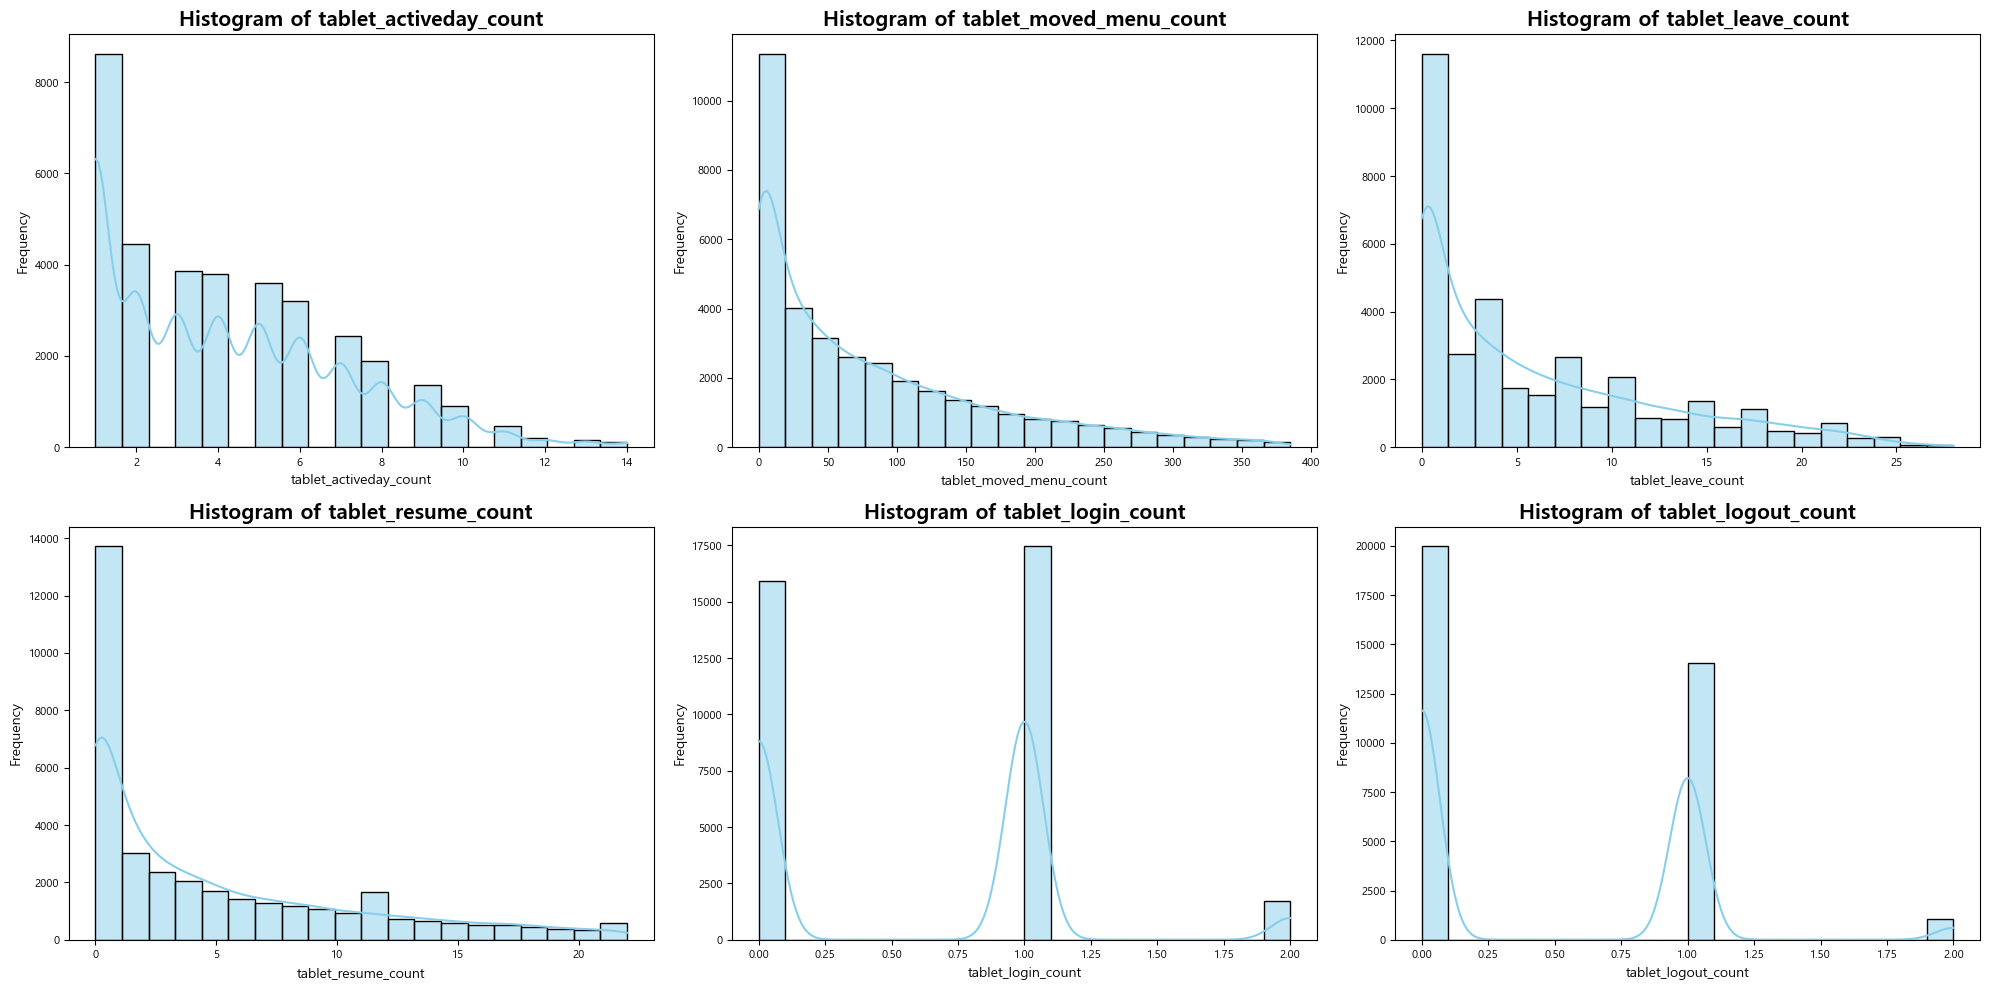

In [82]:
# 2) 변수 분포 시각화

# (1) 히스토그램

# (1)-1 tablet 활동 관련 변수 목록
tablet_vars = [
    "tablet_activeday_count",
    "tablet_moved_menu_count",
    "tablet_leave_count",
    "tablet_resume_count",
    "tablet_login_count",
    "tablet_logout_count",
]


def remove_outliers(df, column):
    """
    Remove outliers using IQR method for a given column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 이상치를 제거한 데이터 프레임
cleaned_df = df.copy()
for var in tablet_vars:
    cleaned_df = remove_outliers(cleaned_df, var)

# 히스토그램 그리기
plt.figure(figsize=(20, 10))

for i, var in enumerate(tablet_vars, 1):
    plt.subplot(2, 3, i)  # 2행 3열의 subplot 배열에서 i번째 위치
    sns.histplot(cleaned_df[var], kde=True, color="skyblue", bins=20)
    plt.title(f"Histogram of {var}", fontsize="15", fontweight="bold")
    plt.xlabel(var, fontsize="10")
    plt.ylabel("Frequency", fontsize="10")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

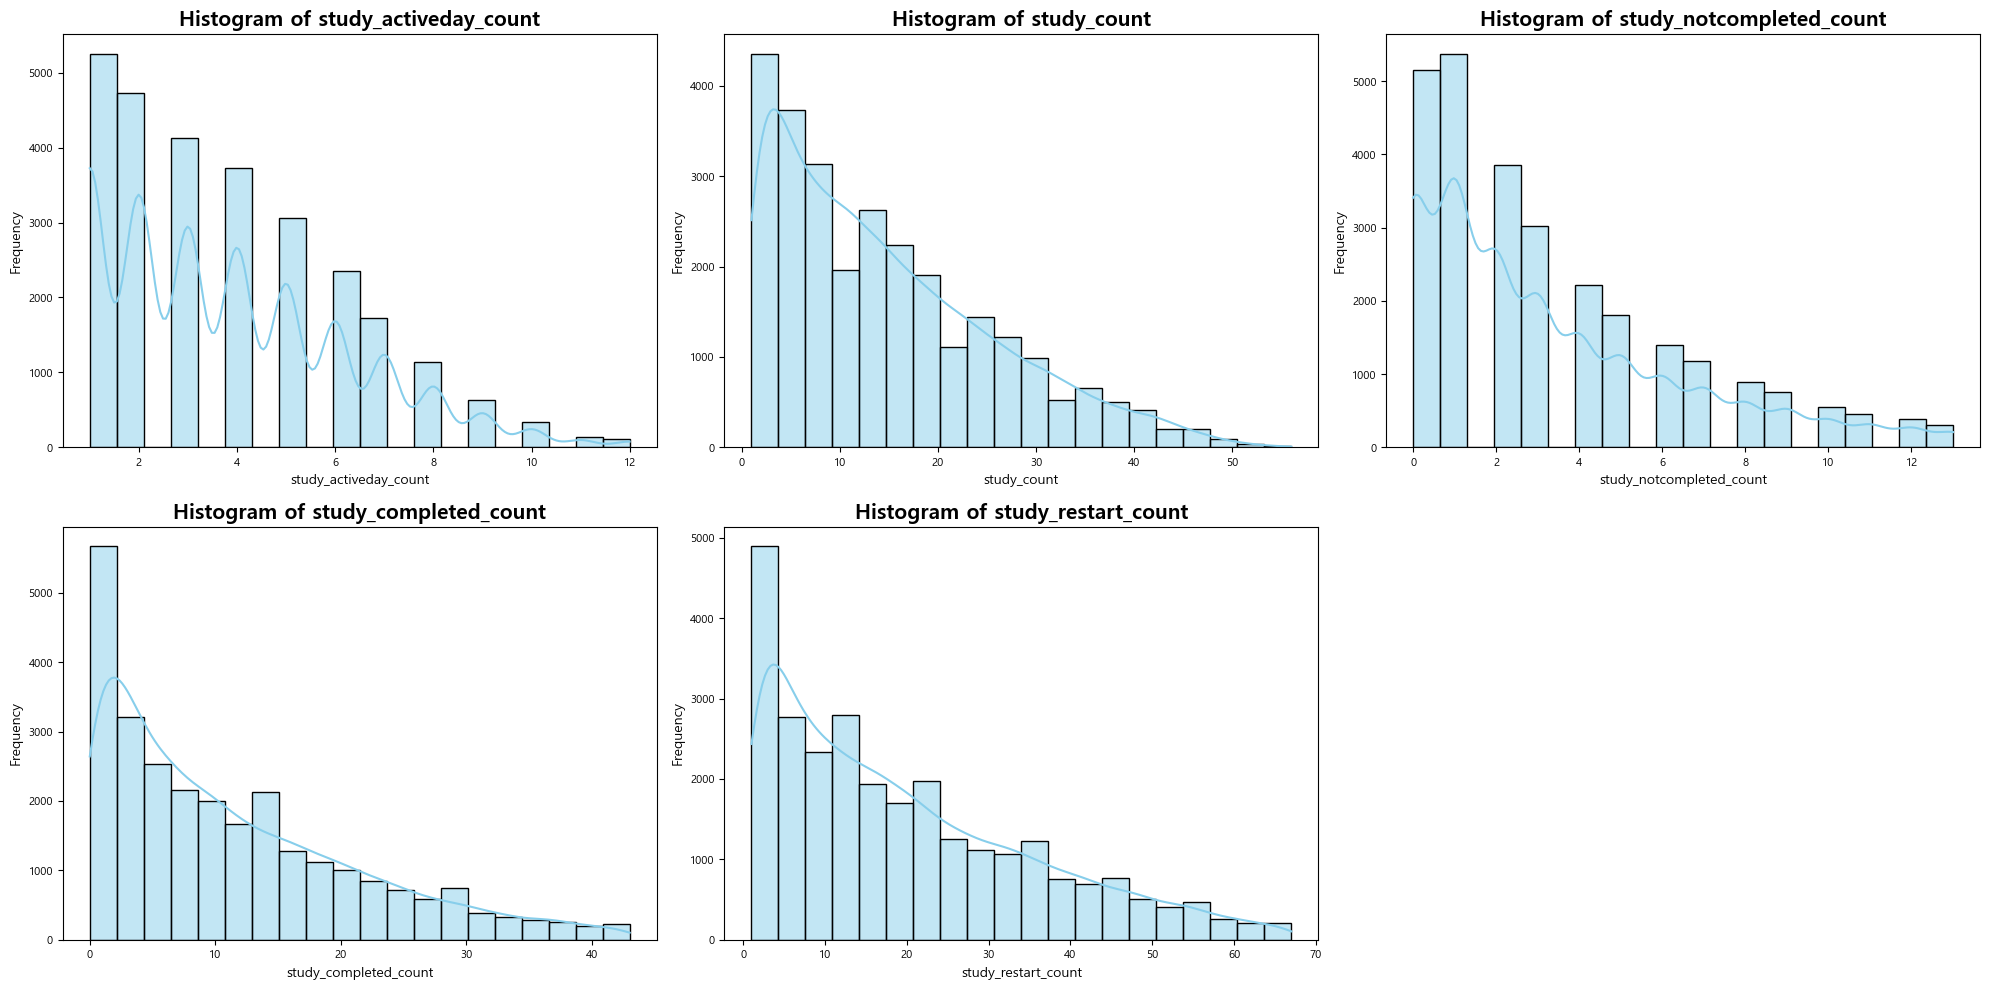

In [83]:
# (1)-2 study 활동 관련 변수 목록
study_vars = [
    "study_activeday_count",
    "study_count",
    "study_notcompleted_count",
    "study_completed_count",
    "study_restart_count",
]


def remove_outliers(df, column):
    """
    Remove outliers using IQR method for a given column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 이상치를 제거한 데이터 프레임
cleaned_df = df.copy()
for var in study_vars:
    cleaned_df = remove_outliers(cleaned_df, var)

# 히스토그램 그리기
plt.figure(figsize=(20, 10))

for i, var in enumerate(study_vars, 1):
    plt.subplot(2, 3, i)  # 2행 3열의 subplot 배열에서 i번째 위치
    sns.histplot(cleaned_df[var], kde=True, color="skyblue", bins=20)
    plt.title(f"Histogram of {var}", fontsize="15", fontweight="bold")
    plt.xlabel(var, fontsize="10")
    plt.ylabel("Frequency", fontsize="10")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\boar2\AppData\Local\Temp\ipykernel_3320\970985783.py:46: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\boar2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


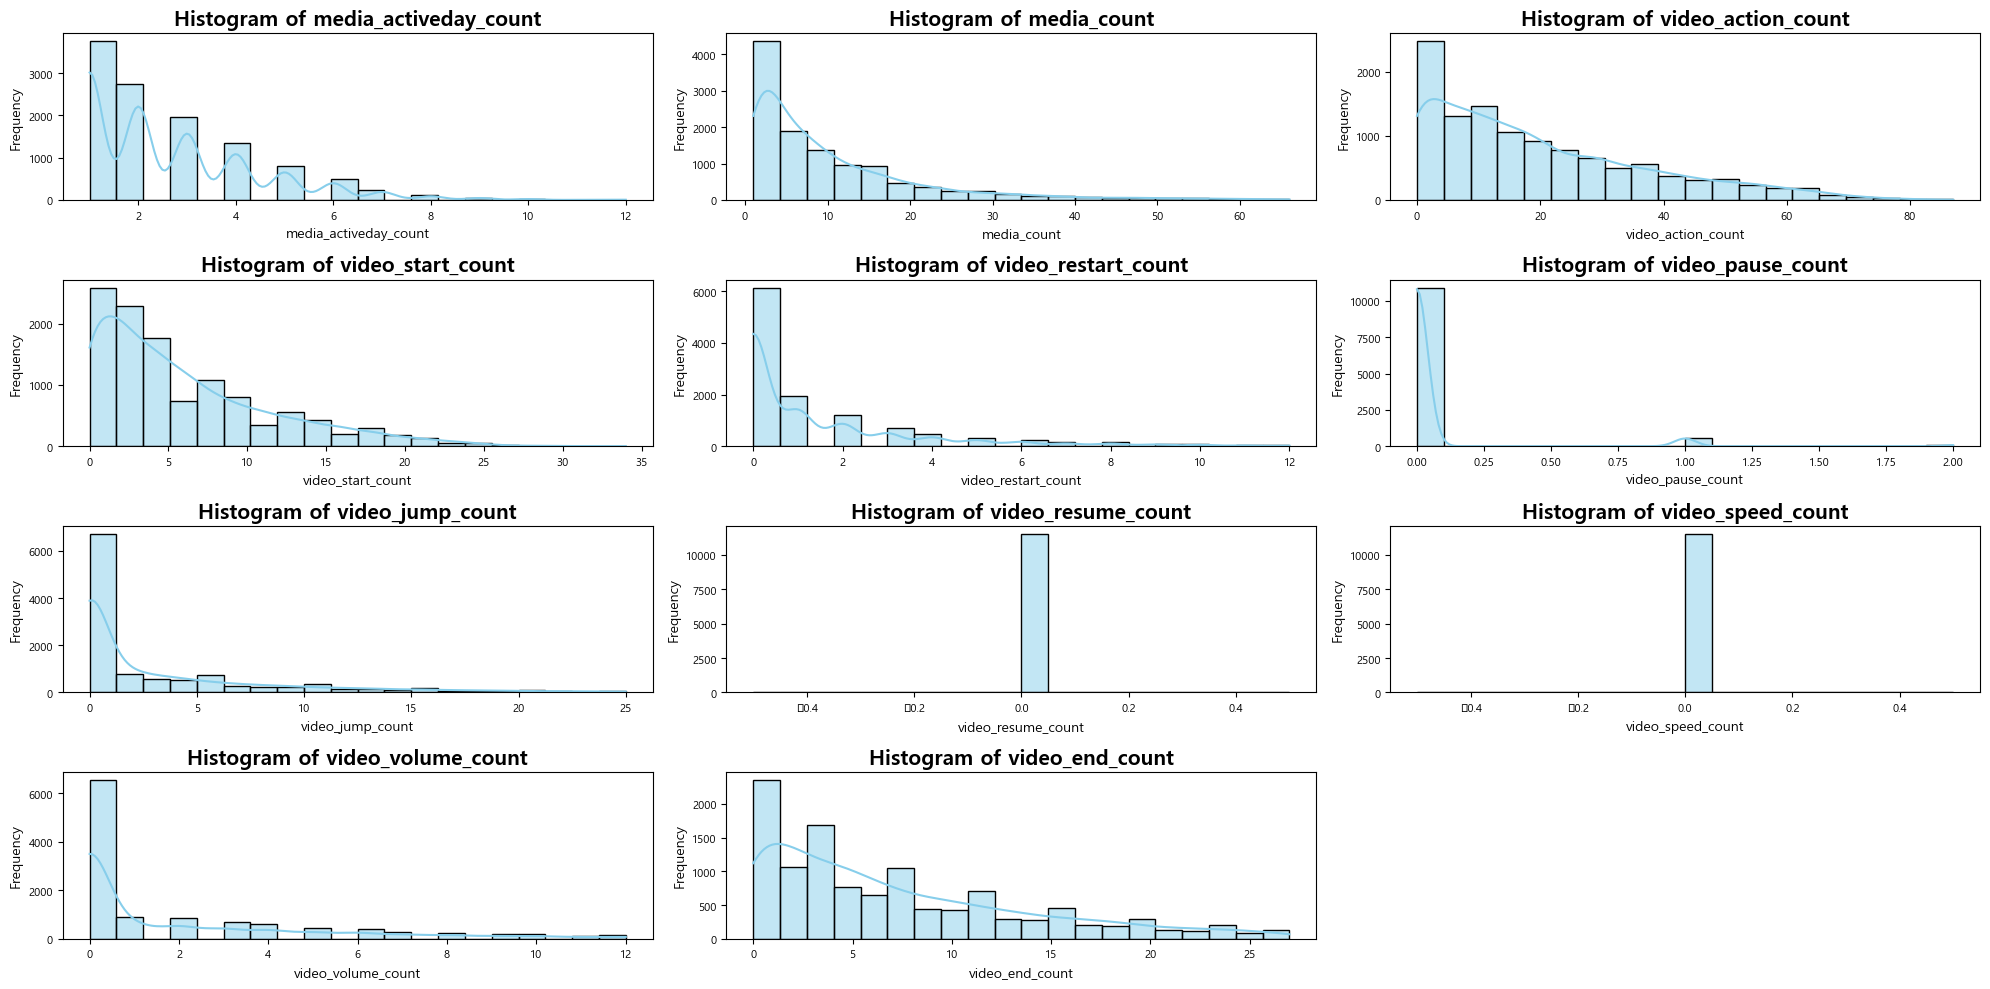

In [84]:
# (1)-3 media & video 활동 관련 변수 목록
media_video_vars = [
    "media_activeday_count",
    "media_count",
    "video_action_count",
    "video_start_count",
    "video_restart_count",
    "video_pause_count",
    "video_jump_count",
    "video_resume_count",
    "video_speed_count",
    "video_volume_count",
    "video_end_count",
]


def remove_outliers(df, column):
    """
    Remove outliers using IQR method for a given column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 이상치를 제거한 데이터 프레임
cleaned_df = df.copy()
for var in media_video_vars:
    cleaned_df = remove_outliers(cleaned_df, var)

# 히스토그램 그리기
plt.figure(figsize=(20, 10))

for i, var in enumerate(media_video_vars, 1):
    plt.subplot(4, 3, i)  # 4행 3열의 subplot 배열에서 i번째 위치
    sns.histplot(cleaned_df[var], kde=True, color="skyblue", bins=20)
    plt.title(f"Histogram of {var}", fontsize="15", fontweight="bold")
    plt.xlabel(var, fontsize="10")
    plt.ylabel("Frequency", fontsize="10")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

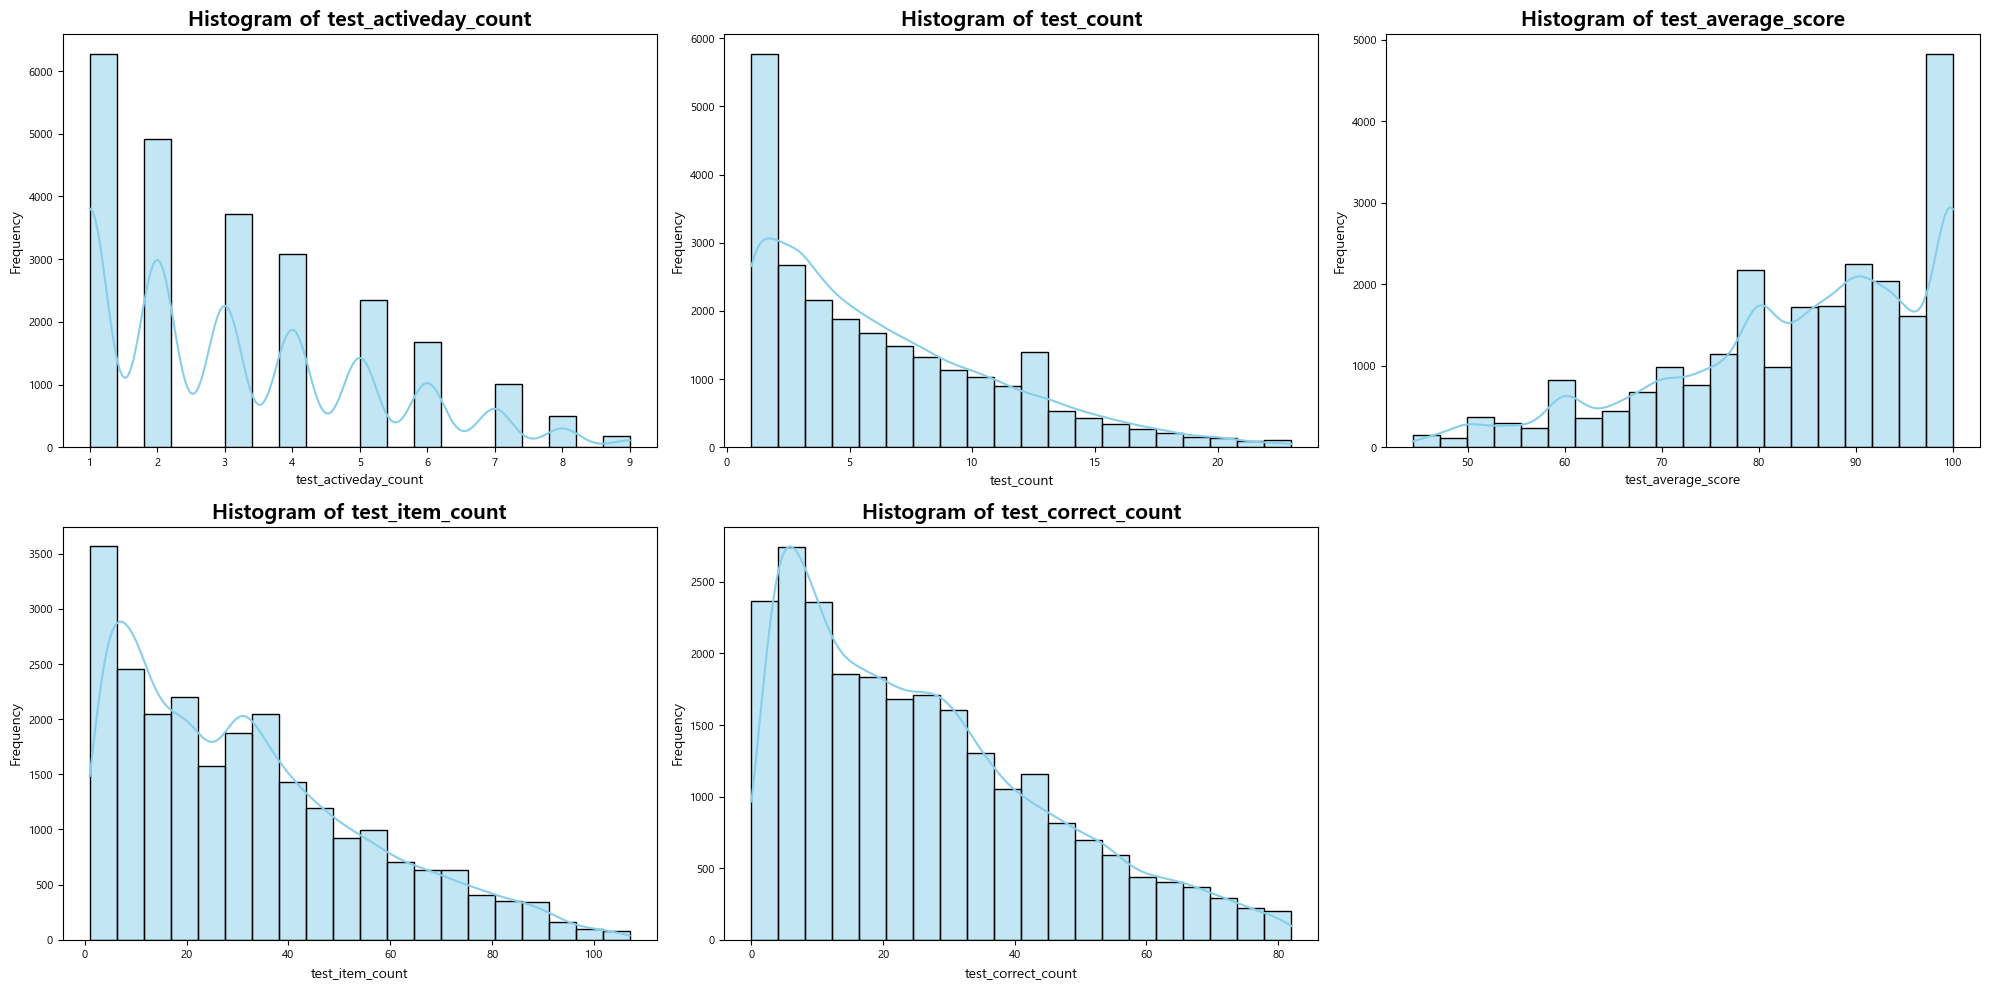

In [85]:
# (1)-4 test 활동 관련 변수 목록
test_vars = [
    "test_activeday_count",  # 각 회원이 평가를 활성화한 일수의 분포
    "test_count",  # 각 회원이 수행한 평가의 총 횟수
    "test_average_score",  # 각 회원의 평가 평균 점수
    "test_item_count",  # 각 평가의 문항 개수
    "test_correct_count",  # 각 회원이 정답을 맞춘 개수
]


def remove_outliers(df, column):
    """
    Remove outliers using IQR method for a given column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 이상치를 제거한 데이터 프레임
cleaned_df = df.copy()
for var in test_vars:
    cleaned_df = remove_outliers(cleaned_df, var)

# 히스토그램 그리기
plt.figure(figsize=(20, 10))

for i, var in enumerate(test_vars, 1):
    plt.subplot(2, 3, i)  # 2행 3열의 subplot 배열에서 i번째 위치
    sns.histplot(cleaned_df[var], kde=True, color="skyblue", bins=20)
    plt.title(f"Histogram of {var}", fontsize="15", fontweight="bold")
    plt.xlabel(var, fontsize="10")
    plt.ylabel("Frequency", fontsize="10")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\boar2\AppData\Local\Temp\ipykernel_3320\2519680232.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\boar2\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


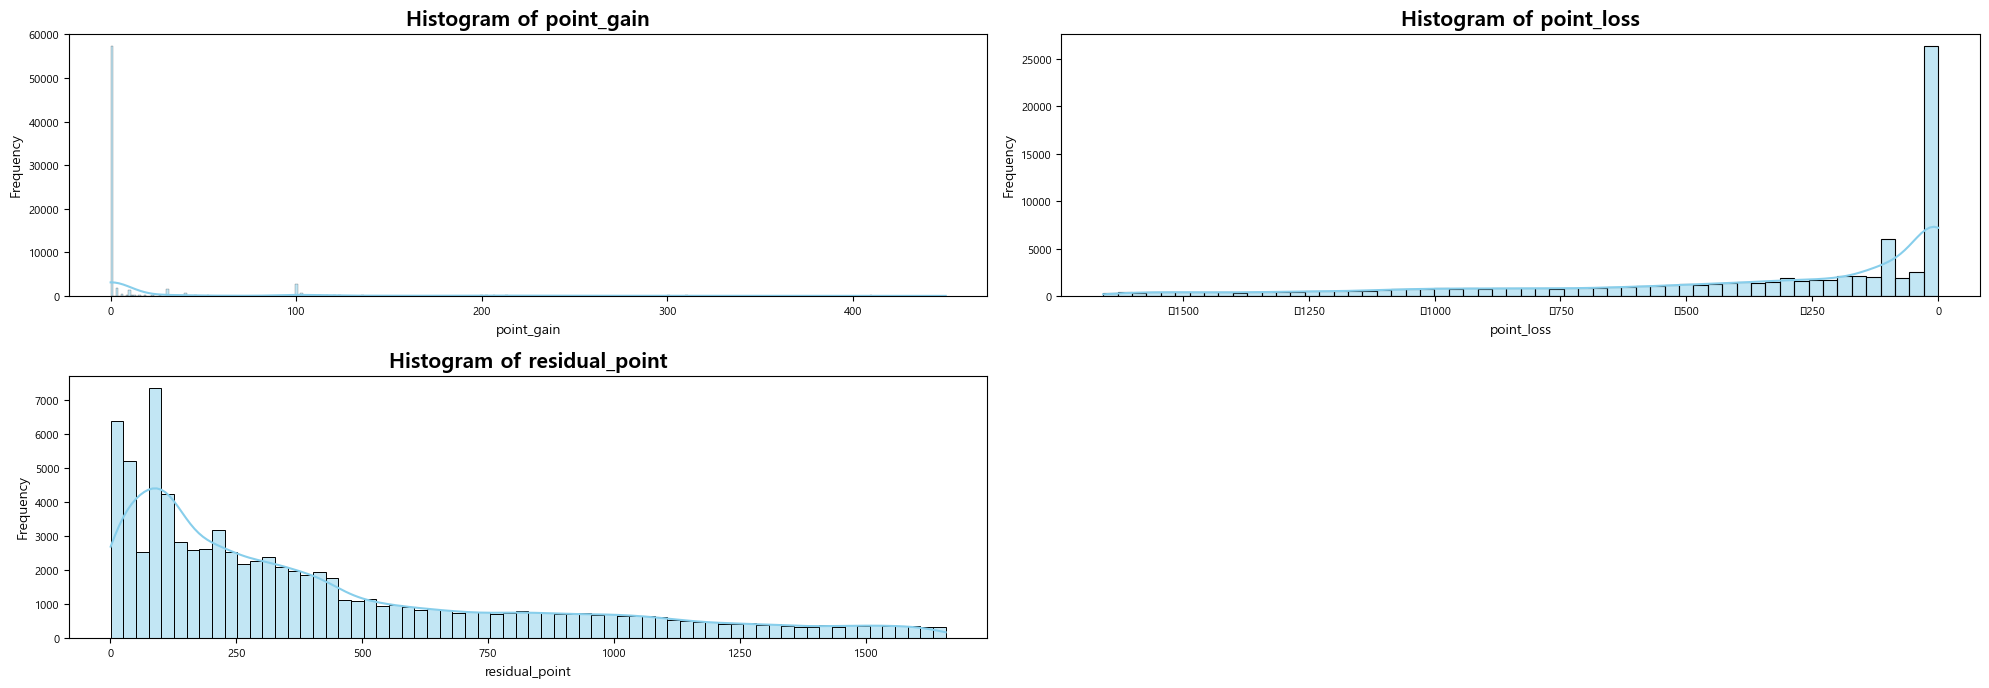

In [86]:
# (1)-5 point 관련 변수 목록
point_vars = ["point_gain", "point_loss"]


# 이상치를 제거하는 함수 정의
def remove_outliers(df, column):
    """
    Remove outliers using IQR method for a given column in the DataFrame.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 'residual_point(잔여포인트)' 변수를 계산하여 추가
df["residual_point"] = df["point_gain"] - df["point_loss"]

# 이상치를 제거한 데이터 프레임 생성
cleaned_df = df.copy()
for var in point_vars + ["residual_point"]:
    cleaned_df = remove_outliers(cleaned_df, var)

# 히스토그램 시각화
plt.figure(figsize=(20, 10))

for i, var in enumerate(point_vars + ["residual_point"], 1):
    plt.subplot(3, 2, i)  # 3행 2열의 서브플롯
    sns.histplot(cleaned_df[var], kde=True, color="skyblue")
    plt.title(f"Histogram of {var}", fontsize="15", fontweight="bold")
    plt.xlabel(var, fontsize="10")
    plt.ylabel("Frequency", fontsize="10")
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\boar2\AppData\Local\Temp\ipykernel_3320\3794562406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Member Status", y="Count", data=status_counts, palette="pastel")


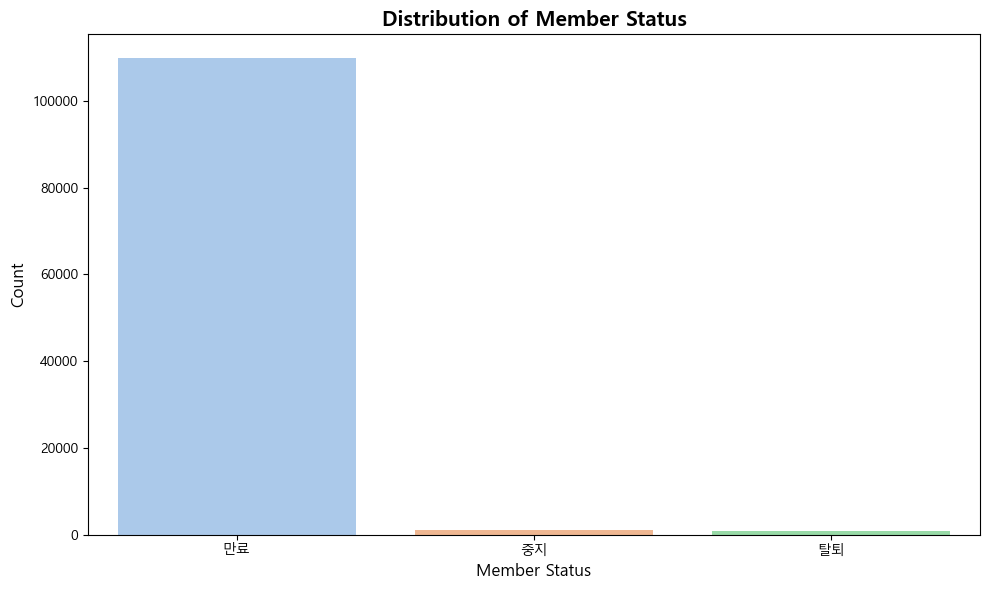

In [87]:
# (2) bar plot
# (2)-1 회원 상태 관련 변수 목록
status_var = "memberstatus"

# 숫자와 한글 상태 매핑
status_mapping = {44: "만료", 66: "중지", 88: "탈퇴"}

# 숫자를 한글로 매핑
df["memberstatus_codename"] = df["memberstatus"].map(status_mapping)

# 데이터 준비: 회원 상태의 빈도수 계산
status_counts = df["memberstatus_codename"].value_counts().reset_index()
status_counts.columns = ["Member Status", "Count"]

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x="Member Status", y="Count", data=status_counts, palette="pastel")
plt.title("Distribution of Member Status", fontsize=15, fontweight="bold")
plt.xlabel("Member Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

# NOTE SMOTE : '만료', '미납', '탈퇴' 두 변수의 count가 너무 적음으로 over sampling 진행

In [88]:
# 이상치 개수 확인(IQR)

# 독립변수 목록
var = [
    "tablet_moved_menu_count",
    "tablet_leave_count",
    "tablet_resume_count",
    "study_count",
    "study_completed_count",
    "study_restart_count",
    "media_count",
    "video_action_count",
    "video_start_count",
    "video_end_count",
    "test_item_count",
    "test_correct_count",
    "test_count",
    "residual_point",
]

# 이상치 개수를 저장할 딕셔너리
outliers_count = {}
outliers_ratio = {}

# 각 변수별로 이상치 개수 계산
for i in var:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 개수 계산
    outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
    outliers_count[i] = outliers.shape[0]

    # 이상치 비율 계산
    outliers_ratio[i] = outliers.shape[0] / df[i].shape[0]

# 결과 출력
outliers_df = pd.DataFrame(
    {
        "Variable": outliers_count.keys(),
        "Outlier Count": outliers_count.values(),
        "Outlier Ratio": [f"{ratio:.2%}" for ratio in outliers_ratio.values()],
    }
)
print(outliers_df)

# NOTE 이상치가 많고, 데이터 분포가 비대칭적이므로 결측치를 Median 으로 대체함

                   Variable  Outlier Count Outlier Ratio
0   tablet_moved_menu_count           2079         1.86%
1        tablet_leave_count           2514         2.25%
2       tablet_resume_count           2855         2.55%
3               study_count           1599         1.43%
4     study_completed_count           1955         1.75%
5       study_restart_count           1854         1.66%
6               media_count           1856         1.66%
7        video_action_count           2158         1.93%
8         video_start_count           1695         1.52%
9           video_end_count           1712         1.53%
10          test_item_count           2041         1.82%
11       test_correct_count           1875         1.68%
12               test_count           1796         1.61%
13           residual_point           5115         4.57%


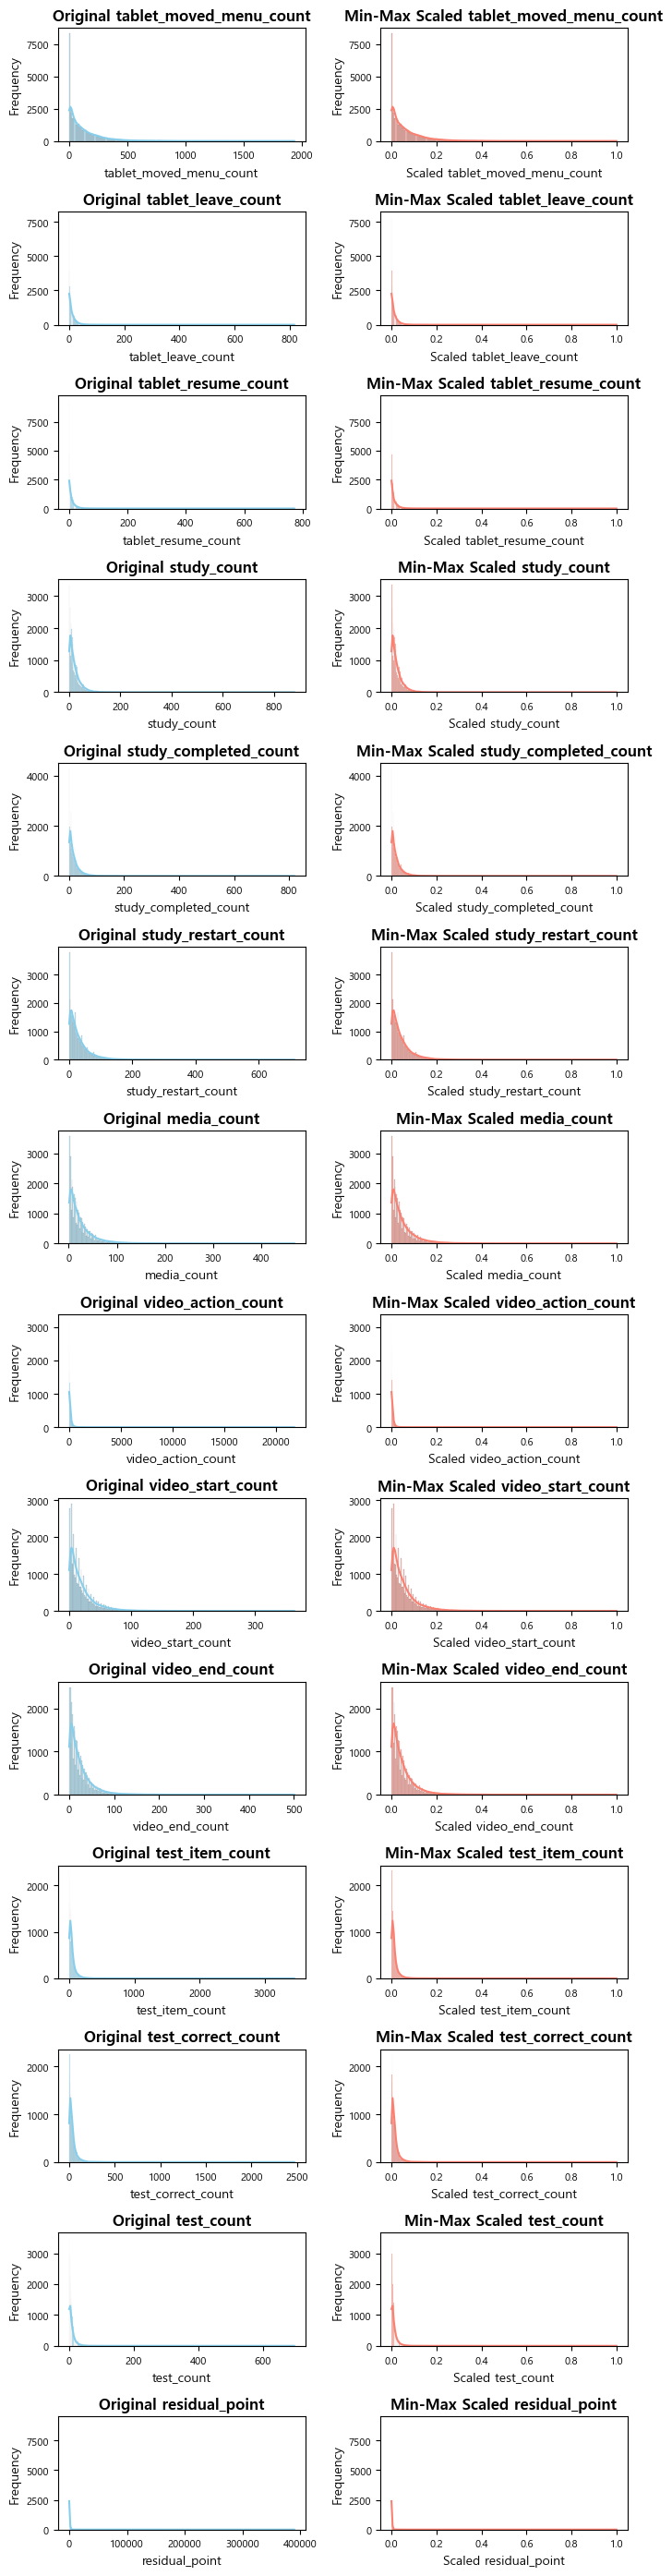

In [89]:
# min-max sacaling [0,1]

# 변환할 변수 목록
var = [
    "tablet_moved_menu_count",
    "tablet_leave_count",
    "tablet_resume_count",
    "study_count",
    "study_completed_count",
    "study_restart_count",
    "media_count",
    "video_action_count",
    "video_start_count",
    "video_end_count",
    "test_item_count",
    "test_correct_count",
    "test_count",
    "residual_point",
]

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 변수에 Min-Max 스케일링 적용
df_scaled = pd.DataFrame(scaler.fit_transform(df[var]), columns=var)

# 히스토그램 시각화
plt.figure(figsize=(7, 2 * len(var)))

for i, col in enumerate(var, 1):
    # 원본 변수 히스토그램
    plt.subplot(len(var), 2, 2 * i - 1)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Original {col}", fontsize=12, fontweight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Min-Max 스케일링된 변수 히스토그램
    plt.subplot(len(var), 2, 2 * i)
    sns.histplot(df_scaled[col], kde=True, color="salmon")
    plt.title(f"Min-Max Scaled {col}", fontsize=12, fontweight="bold")
    plt.xlabel(f"Scaled {col}", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [90]:
# 3. 모델 선택 및 학습

# 변환된 변수로 X 구성 (스케일링된 변수 사용)
X = df_scaled[var]  # 스케일링된 독립변수를 사용
y = df["memberstatus"]  # 종속변수

# 결측치 처리: 결측치를 중앙값(Median)으로 대체
X = X.fillna(X.median())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)

# 클래스 분포 확인 (SMOTE 적용 전)
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# SMOTE 적용 (자동으로 최적의 샘플 수 설정)
smote = SMOTE(sampling_strategy="auto", random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인 (SMOTE 적용 후)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 소프트맥스 회귀 모델 학습
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=1234)
model.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 재평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# 정밀도, 재현율, F1-Score 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["만료", "중지", "탈퇴"]))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Class distribution before SMOTE:
memberstatus
44    76920
66      742
88      633
Name: count, dtype: int64
Class distribution after SMOTE:
memberstatus
44    76920
88    76920
66    76920
Name: count, dtype: int64
Accuracy: 0.24

Classification Report:
              precision    recall  f1-score   support

          만료       0.99      0.23      0.37     32972
          중지       0.03      0.46      0.06       325
          탈퇴       0.01      0.94      0.02       259

    accuracy                           0.24     33556
   macro avg       0.34      0.54      0.15     33556
weighted avg       0.98      0.24      0.36     33556

Confusion Matrix:
[[ 7513  4786 20673]
 [   43   151   131]
 [   16     0   243]]


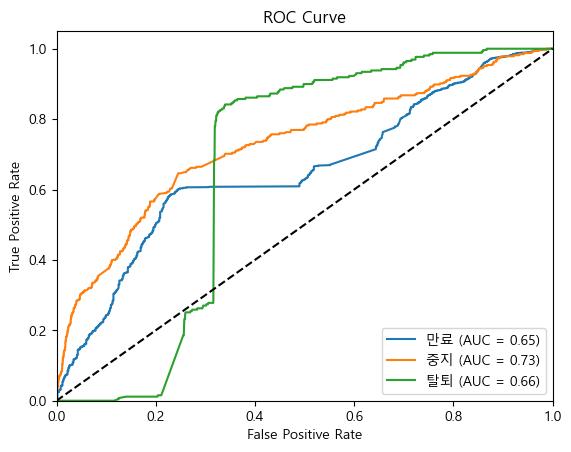

In [91]:
# ROC 커브 그리기

# 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # ROC 곡선을 위해 예측 확률 계산

# ROC 곡선 및 AUC 계산
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

# One-vs-Rest ROC 곡선 그리기
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        y_test, y_pred_prob[:, i], pos_label=model.classes_[i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC 곡선 그리기
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # 대각선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

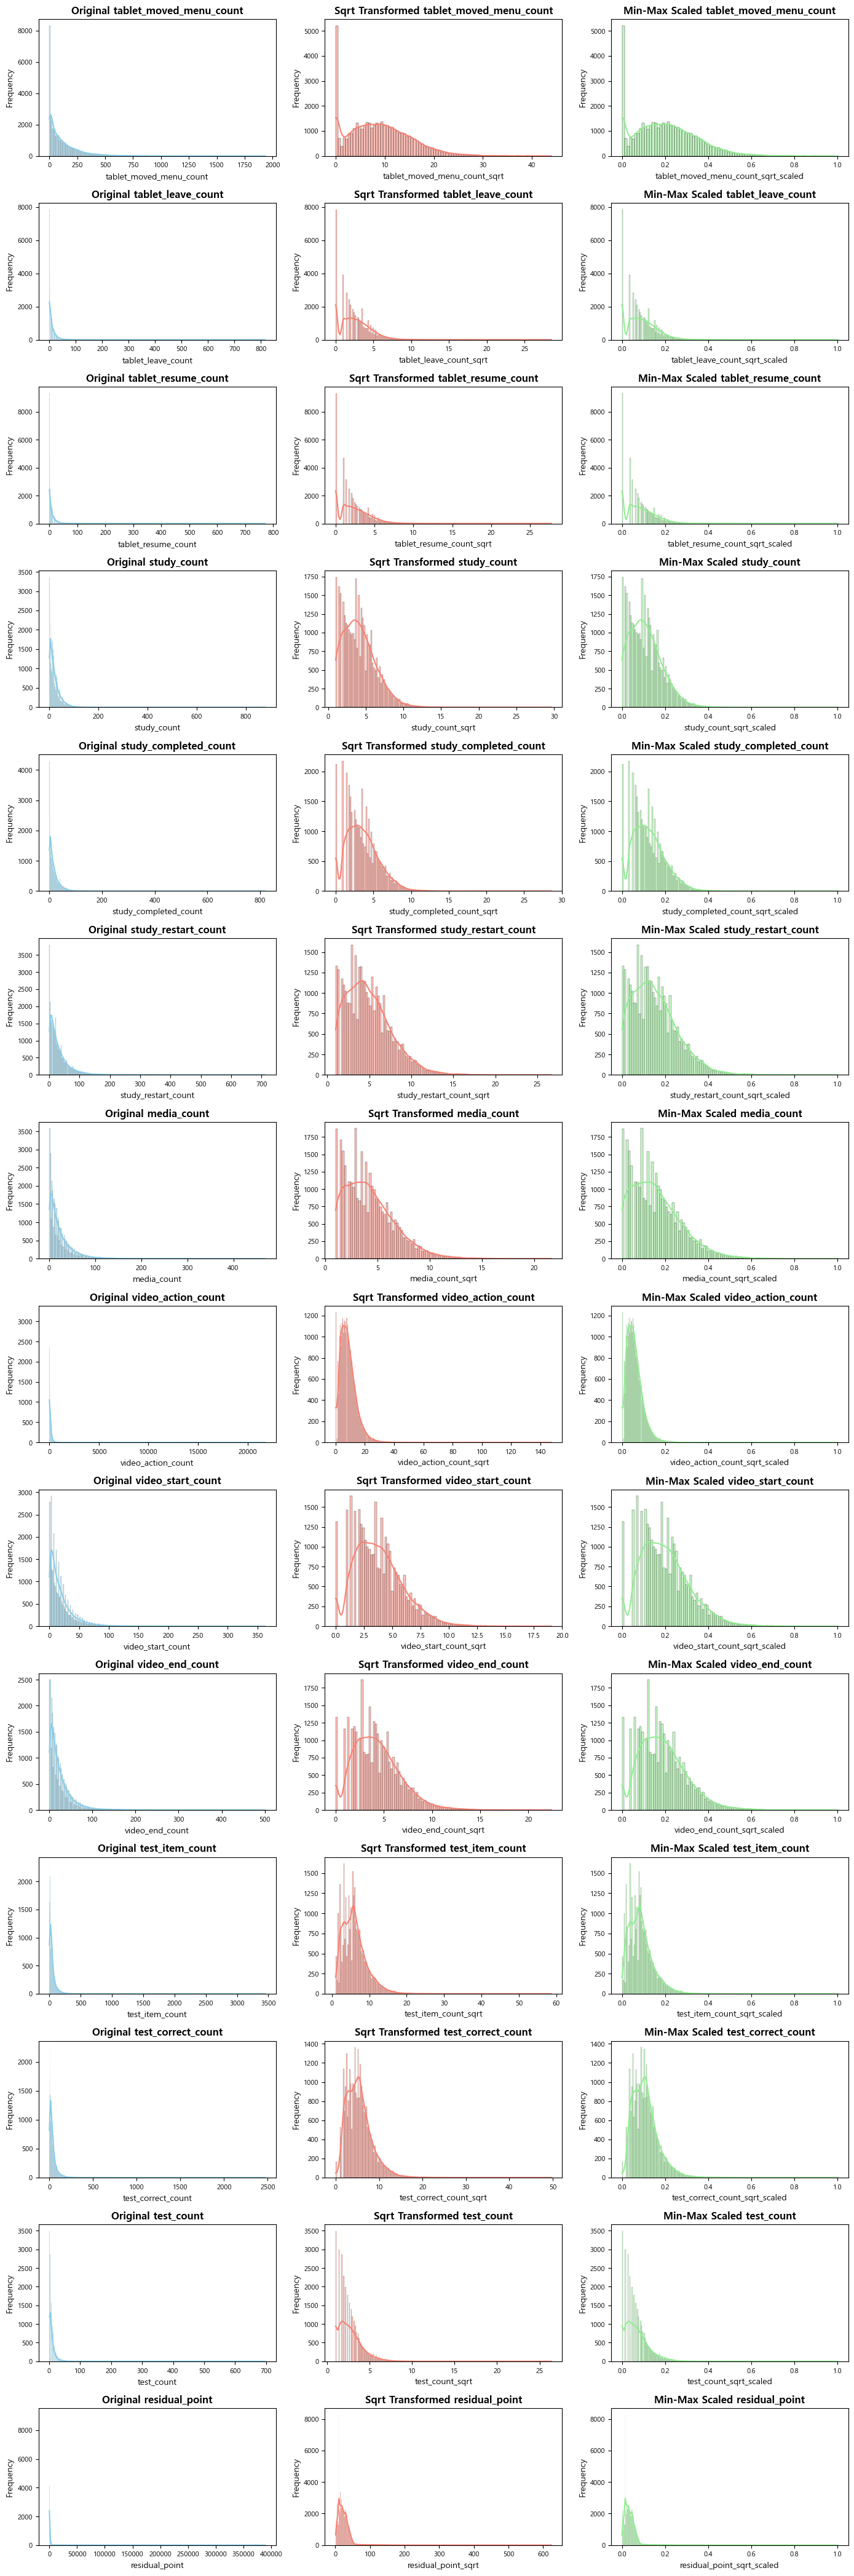

In [92]:
# 5. 재학습

# 1) 변수 변환

# (1) 제곱근 변환 & min-max 스케일링


# 제곱근 변환 함수
def sqrt_transform(df, columns):
    df_sqrt = df.copy()  # 원본 데이터프레임을 복사하여 수정
    # 각 열에 대해 제곱근 변환을 수행하고 새로운 열에 저장
    for col in columns:
        df_sqrt[f"{col}_sqrt"] = np.sqrt(df[col])
    return df_sqrt


# 변환할 변수 목록
var_sqrt = [
    "tablet_moved_menu_count",
    "tablet_leave_count",
    "tablet_resume_count",
    "study_count",
    "study_completed_count",
    "study_restart_count",
    "media_count",
    "video_action_count",
    "video_start_count",
    "video_end_count",
    "test_item_count",
    "test_correct_count",
    "test_count",
    "residual_point",
]

# 제곱근 변환 적용
df_sqrt = sqrt_transform(df, var_sqrt)

# Min-Max Scaler 객체 생성
scaler_sqrt = MinMaxScaler()

# 제곱근 변환된 변수에 Min-Max 스케일링 적용
df_sqrt_scaled = df_sqrt.copy()

# 각 변수에 대해 Min-Max 스케일링 적용
for col in [f"{var}_sqrt" for var in var_sqrt]:
    df_sqrt_scaled[col] = scaler_sqrt.fit_transform(df_sqrt[[col]])

# 히스토그램 시각화
plt.figure(figsize=(14, 3 * len(var_sqrt)))

for i, var in enumerate(var_sqrt, 1):
    # 원본 변수 히스토그램
    plt.subplot(len(var_sqrt), 3, 3 * i - 2)
    sns.histplot(df[var], kde=True, color="skyblue")
    plt.title(f"Original {var}", fontsize=12, fontweight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # 제곱근 변환된 변수 히스토그램
    plt.subplot(len(var_sqrt), 3, 3 * i - 1)
    sns.histplot(df_sqrt[f"{var}_sqrt"], kde=True, color="salmon")
    plt.title(f"Sqrt Transformed {var}", fontsize=12, fontweight="bold")
    plt.xlabel(f"{var}_sqrt", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Min-Max 스케일링된 변수 히스토그램
    plt.subplot(len(var_sqrt), 3, 3 * i)
    sns.histplot(df_sqrt_scaled[f"{var}_sqrt"], kde=True, color="lightgreen")
    plt.title(f"Min-Max Scaled {var}", fontsize=12, fontweight="bold")
    plt.xlabel(f"{var}_sqrt_scaled", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

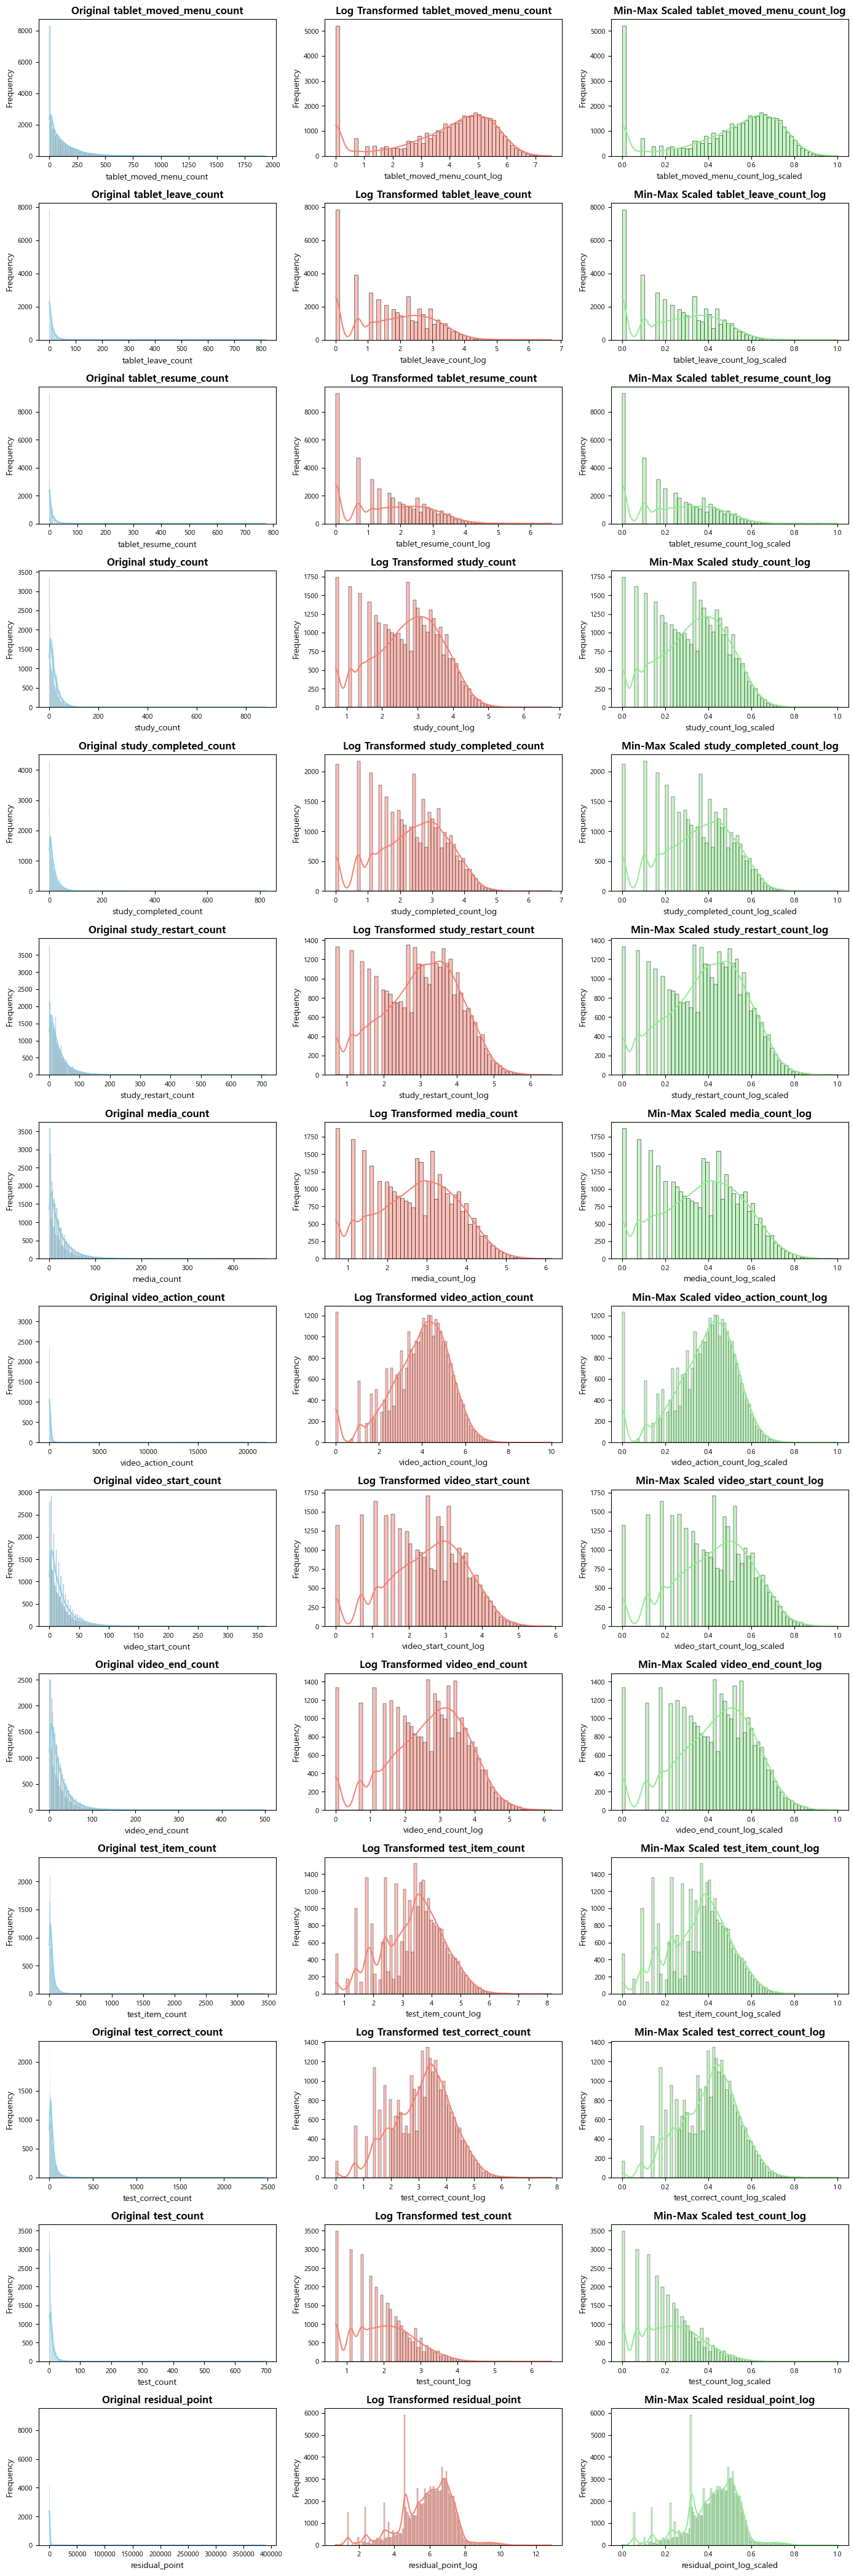

In [93]:
# (2) 로그 변환 & min-max 스케일링


# 로그 변환 함수
def log_transform(df, columns):
    df_log = df.copy()  # 원본 데이터프레임을 복사하여 수정
    for col in columns:
        df_log[f"{col}_log"] = np.log(df[col] + 1)  # +1을 추가하여 0을 처리
    return df_log


# 변환할 변수 목록
var_log = [
    "tablet_moved_menu_count",
    "tablet_leave_count",
    "tablet_resume_count",
    "study_count",
    "study_completed_count",
    "study_restart_count",
    "media_count",
    "video_action_count",
    "video_start_count",
    "video_end_count",
    "test_item_count",
    "test_correct_count",
    "test_count",
    "residual_point",
]

# 원본 데이터프레임에서 변수 선택
X = df[var_log]

# 로그 변환 적용
df_log = log_transform(df, var_log)

# Min-Max Scaler 객체 생성
scaler_log = MinMaxScaler()

# 로그 변환된 변수에 Min-Max 스케일링 적용
df_log_scaled = df_log.copy()
for col in [f"{var}_log" for var in var_log]:
    df_log_scaled[col] = scaler_log.fit_transform(df_log[[col]])

# 히스토그램 시각화
plt.figure(figsize=(14, 3 * len(var_log)))

for i, var in enumerate(var_log, 1):
    # 원본 변수 히스토그램
    plt.subplot(len(var_log), 3, 3 * i - 2)
    sns.histplot(df[var], kde=True, color="skyblue")
    plt.title(f"Original {var}", fontsize=12, fontweight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # 로그 변환된 변수 히스토그램
    plt.subplot(len(var_log), 3, 3 * i - 1)
    sns.histplot(df_log[f"{var}_log"], kde=True, color="salmon")
    plt.title(f"Log Transformed {var}", fontsize=12, fontweight="bold")
    plt.xlabel(f"{var}_log", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Min-Max 스케일링된 로그 변환 변수 히스토그램
    plt.subplot(len(var_log), 3, 3 * i)
    sns.histplot(df_log_scaled[f"{var}_log"], kde=True, color="lightgreen")
    plt.title(f"Min-Max Scaled {var}_log", fontsize=12, fontweight="bold")
    plt.xlabel(f"{var}_log_scaled", fontsize=10)
    plt.ylabel("Frequency", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [94]:
# 2) 재학습 및 평가

# (1) 제곱근 변환 변수

# 변환된 변수로 X 구성 (스케일링된 변수 사용)
X = df_sqrt_scaled[
    [f"{var}_sqrt" for var in var_sqrt]
]  # 제곱근 변환 및 스케일링된 독립변수를 사용
y = df["memberstatus"]  # 종속변수

# 결측치 처리: 결측치를 중앙값(Median)으로 대체
X = X.fillna(X.median())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)

# 클래스 분포 확인 (SMOTE 적용 전)
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# SMOTE 적용 (자동으로 최적의 샘플 수 설정)
smote = SMOTE(sampling_strategy="auto", random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인 (SMOTE 적용 후)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 소프트맥스 회귀 모델 학습
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=1234)
model.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 재평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# 정밀도, 재현율, F1-Score 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["만료", "중지", "탈퇴"]))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Class distribution before SMOTE:
memberstatus
44    76920
66      742
88      633
Name: count, dtype: int64
Class distribution after SMOTE:
memberstatus
44    76920
88    76920
66    76920
Name: count, dtype: int64
Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

          만료       0.99      0.45      0.62     32972
          중지       0.03      0.52      0.06       325
          탈퇴       0.02      0.88      0.03       259

    accuracy                           0.45     33556
   macro avg       0.35      0.61      0.24     33556
weighted avg       0.98      0.45      0.61     33556

Confusion Matrix:
[[14714  5056 13202]
 [   68   168    89]
 [   31     0   228]]


c:\Users\boar2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


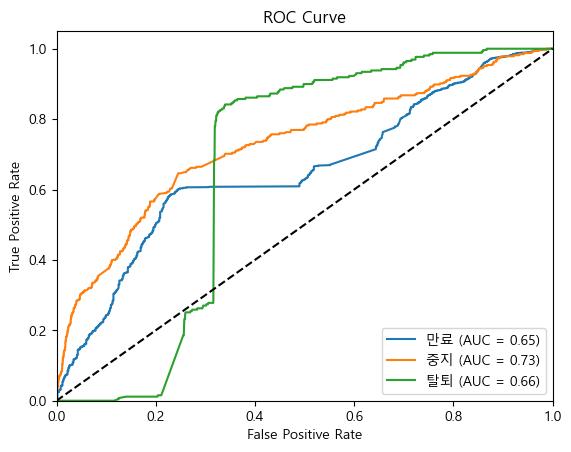

In [95]:
# ROC 커브 그리기

# 클래스 이름을 지정
class_names = ["만료", "중지", "탈퇴"]

# ROC 곡선 및 AUC 계산
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        y_test, y_pred_prob[:, i], pos_label=model.classes_[i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC 곡선 그리기
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [96]:
# 2) 재학습 및 평가

# (2) 로그 변환 변수

# 변환된 변수로 X 구성 (로그 변환 및 스케일링된 변수 사용)
X = df_log_scaled[
    [f"{var}_log" for var in var_log]
]  # 로그 변환 및 스케일링된 독립변수를 사용
y = df["memberstatus"]  # 종속변수

# 결측치 처리: 결측치를 중앙값(Median)으로 대체
X = X.fillna(X.median())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1234
)

# 클래스 분포 확인 (SMOTE 적용 전)
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# SMOTE 적용 (자동으로 최적의 샘플 수 설정)
smote = SMOTE(sampling_strategy="auto", random_state=1234)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 클래스 분포 확인 (SMOTE 적용 후)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 소프트맥스 회귀 모델 학습
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=1234)
model.fit(X_train_resampled, y_train_resampled)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 재평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

# 정밀도, 재현율, F1-Score 보고서
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["만료", "중지", "탈퇴"]))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Class distribution before SMOTE:
memberstatus
44    76920
66      742
88      633
Name: count, dtype: int64
Class distribution after SMOTE:
memberstatus
44    76920
88    76920
66    76920
Name: count, dtype: int64
Accuracy: 0.49

Classification Report:
              precision    recall  f1-score   support

          만료       0.99      0.48      0.65     32972
          중지       0.03      0.54      0.06       325
          탈퇴       0.02      0.86      0.04       259

    accuracy                           0.49     33556
   macro avg       0.35      0.63      0.25     33556
weighted avg       0.98      0.49      0.64     33556

Confusion Matrix:
[[15890  5014 12068]
 [   71   177    77]
 [   35     0   224]]


c:\Users\boar2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


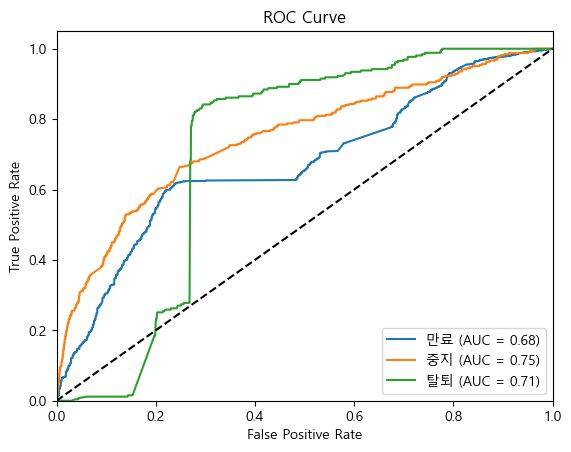

In [97]:
# ROC 커브 그리기

# 클래스 이름을 지정
class_names = ["만료", "중지", "탈퇴"]

# 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # ROC 곡선을 위해 예측 확률 계산

# ROC 곡선 및 AUC 계산
n_classes = len(model.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(
        y_test, y_pred_prob[:, i], pos_label=model.classes_[i]
    )
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC 곡선 그리기
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

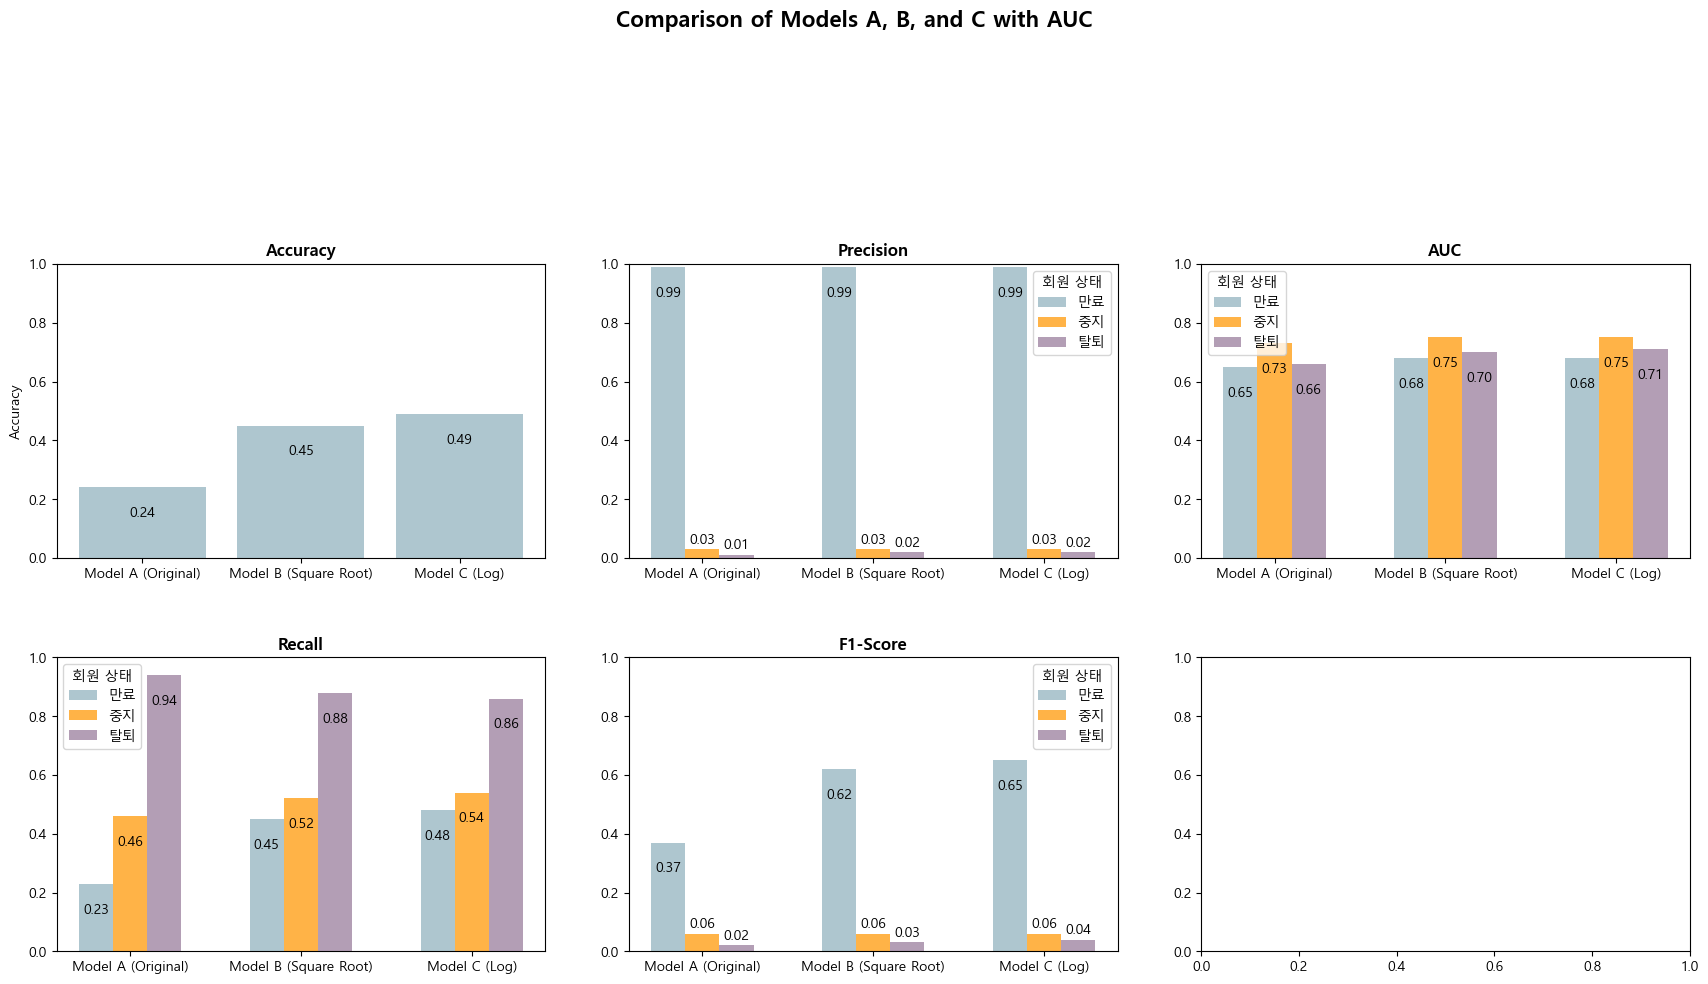

In [98]:
# 6. 모델 성능 요약 및 비교

# 모델 이름 정의
model_names = ["Model A (Original)", "Model B (Square Root)", "Model C (Log)"]

accuracy = [0.24, 0.45, 0.49]

precision = {
    "만료": [0.99, 0.99, 0.99],
    "중지": [0.03, 0.03, 0.03],
    "탈퇴": [0.01, 0.02, 0.02],
}

recall = {
    "만료": [0.23, 0.45, 0.48],
    "중지": [0.46, 0.52, 0.54],
    "탈퇴": [0.94, 0.88, 0.86],
}

f1_score = {
    "만료": [0.37, 0.62, 0.65],
    "중지": [0.06, 0.06, 0.06],
    "탈퇴": [0.02, 0.03, 0.04],
}

auc_values = {
    "만료": [0.65, 0.68, 0.68],
    "중지": [0.73, 0.75, 0.75],
    "탈퇴": [0.66, 0.70, 0.71],
}

# 시각화 - 막대 그래프 위의 값 위치 조정
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Comparison of Models A, B, and C with AUC", fontsize=16, fontweight="bold", y=1.05
)

# 파스텔 톤 색상 설정
colors = ["#AEC6CF", "#FFB347", "#B39EB5"]

# Accuracy
axes[0, 0].bar(model_names, accuracy, color=colors[0])
axes[0, 0].set_title("Accuracy", fontweight="bold")
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel("Accuracy")
for i, v in enumerate(accuracy):
    axes[0, 0].text(
        i, v - 0.1, f"{v:.2f}", ha="center", color="black"
    )  # 값을 막대 상단에서 더 낮게 위치

# Precision
width = 0.2
x = np.arange(len(model_names))

axes[0, 1].bar(x - width, precision["만료"], width, label="만료", color=colors[0])
axes[0, 1].bar(x, precision["중지"], width, label="중지", color=colors[1])
axes[0, 1].bar(x + width, precision["탈퇴"], width, label="탈퇴", color=colors[2])
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(model_names)
axes[0, 1].set_title("Precision", fontweight="bold")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].legend(title="회원 상태", labels=["만료", "중지", "탈퇴"])
for i in range(len(model_names)):
    axes[0, 1].text(
        x[i] - width,
        precision["만료"][i] - 0.1,
        f"{precision['만료'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[0, 1].text(
        x[i],
        precision["중지"][i] + 0.02,
        f"{precision['중지'][i]:.2f}",
        ha="center",
        color="black",
    )  # 주황색 막대 위로
    axes[0, 1].text(
        x[i] + width,
        precision["탈퇴"][i] + 0.02,
        f"{precision['탈퇴'][i]:.2f}",
        ha="center",
        color="black",
    )  # 보라색 막대 위로

# Recall
axes[1, 0].bar(x - width, recall["만료"], width, label="만료", color=colors[0])
axes[1, 0].bar(x, recall["중지"], width, label="중지", color=colors[1])
axes[1, 0].bar(x + width, recall["탈퇴"], width, label="탈퇴", color=colors[2])
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(model_names)
axes[1, 0].set_title("Recall", fontweight="bold")
axes[1, 0].set_ylim(0, 1)
axes[1, 0].legend(title="회원 상태", labels=["만료", "중지", "탈퇴"])
for i in range(len(model_names)):
    axes[1, 0].text(
        x[i] - width,
        recall["만료"][i] - 0.1,
        f"{recall['만료'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[1, 0].text(
        x[i],
        recall["중지"][i] - 0.1,
        f"{recall['중지'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[1, 0].text(
        x[i] + width,
        recall["탈퇴"][i] - 0.1,
        f"{recall['탈퇴'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치

# F1-Score
axes[1, 1].bar(x - width, f1_score["만료"], width, label="만료", color=colors[0])
axes[1, 1].bar(x, f1_score["중지"], width, label="중지", color=colors[1])
axes[1, 1].bar(x + width, f1_score["탈퇴"], width, label="탈퇴", color=colors[2])
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(model_names)
axes[1, 1].set_title("F1-Score", fontweight="bold")
axes[1, 1].set_ylim(0, 1)
axes[1, 1].legend(title="회원 상태", labels=["만료", "중지", "탈퇴"])
for i in range(len(model_names)):
    axes[1, 1].text(
        x[i] - width,
        f1_score["만료"][i] - 0.1,
        f"{f1_score['만료'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[1, 1].text(
        x[i],
        f1_score["중지"][i] + 0.02,
        f"{f1_score['중지'][i]:.2f}",
        ha="center",
        color="black",
    )  # 주황색 막대 위로
    axes[1, 1].text(
        x[i] + width,
        f1_score["탈퇴"][i] + 0.02,
        f"{f1_score['탈퇴'][i]:.2f}",
        ha="center",
        color="black",
    )  # 보라색 막대 위로

# AUC
axes[0, 2].bar(x - width, auc_values["만료"], width, label="만료", color=colors[0])
axes[0, 2].bar(x, auc_values["중지"], width, label="중지", color=colors[1])
axes[0, 2].bar(x + width, auc_values["탈퇴"], width, label="탈퇴", color=colors[2])
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(model_names)
axes[0, 2].set_title("AUC", fontweight="bold")
axes[0, 2].set_ylim(0, 1)
axes[0, 2].legend(title="회원 상태", labels=["만료", "중지", "탈퇴"])
for i in range(len(model_names)):
    axes[0, 2].text(
        x[i] - width,
        auc_values["만료"][i] - 0.1,
        f"{auc_values['만료'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[0, 2].text(
        x[i],
        auc_values["중지"][i] - 0.1,
        f"{auc_values['중지'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치
    axes[0, 2].text(
        x[i] + width,
        auc_values["탈퇴"][i] - 0.1,
        f"{auc_values['탈퇴'][i]:.2f}",
        ha="center",
        color="black",
    )  # 낮게 위치

plt.tight_layout(pad=4.0, rect=[0, 0.03, 1, 0.95])  # 간격을 넓히고 레이아웃 조정
plt.show()